# Propagation of a wave packet in a potential

This code computes the time evolution of a wave packet in a potential. Play around yourself with the potential shape, and see how the wave packet behaves!

In [1]:
import numpy as np
import scipy.sparse
from cmath import exp

In [2]:
from timeprop import propagate

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [128]:
def make_hamiltonian(L=100, pot_func=None):
    t = 1
    
    ham = np.zeros(shape=(L, L), dtype=complex)
    
    if pot_func is not None:
        pot = np.array([pot_func(i) for i in range(L)])
    else:
        pot = np.zeros(shape=(L,))

    np.fill_diagonal(ham, 2 * t + pot)
    
    offdiag = np.zeros(shape=(L-1,), dtype=complex)
    offdiag[:] = -t
    np.fill_diagonal(ham[1:, :-1], offdiag)
    np.fill_diagonal(ham[:-1, 1:], offdiag)
    
    # finally, periodic boundary conditions
    ham[0, -1] = -t
    ham[-1, 0] = -t
    
    return scipy.sparse.csr_matrix(ham), pot

In [129]:
def init_wave_packet(L, zero_pos, width, energy):
    psi = np.zeros(shape=(L,), dtype=complex)
    
    for i in range(L):
        x = i
        psi[i] += exp(1j*np.sqrt(energy)*x) *exp(-0.5*(x-zero_pos)**2/width**2)
    return psi

In [130]:
def pot_gauss(x):
    return -0.02*exp(-(x-1500.0)**2/100**2)

def pot_step(x):
    if 1300 < x < 1700:
        return -0.02
    else:
        return 0

In [131]:
L = 3000
energy = 0.01

In [132]:
ham, pot = make_hamiltonian(L=L, pot_func=pot_gauss)
init_psi = init_wave_packet(L, 750, 100, energy)

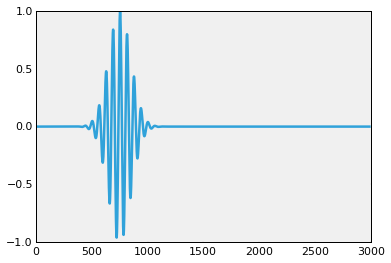

In [133]:
plt.plot(init_psi)

In [137]:
psis = []
psi = init_psi.copy()
for n in xrange(1000):
    if n%10 == 0:
        psis.append(psi)
    psi = propagate(ham, psi, 10)

## Plot using holoviews

Holoviews makes the nicer plots, but can be a bit slower on some computers

In [138]:
import holoviews as hv
%load_ext holoviews.ipython
%output holomap='auto'

The holoviews.ipython extension is already loaded. To reload it, use:
  %reload_ext holoviews.ipython


:HoloMap   [time]
   :Overlay
      .Curve.I  :Curve   [x]   (y)
      .Curve.II :Curve   [x]   (y)
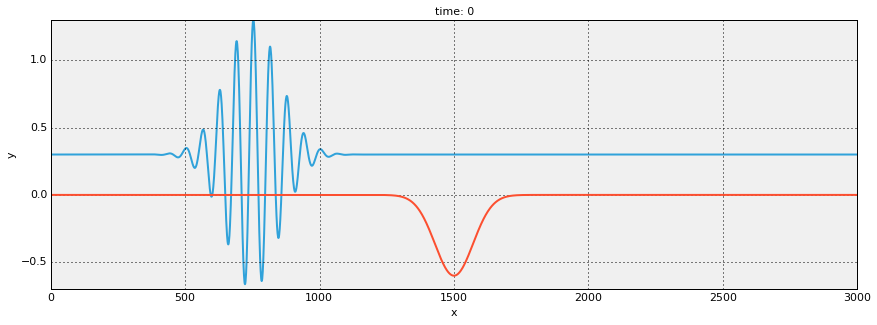
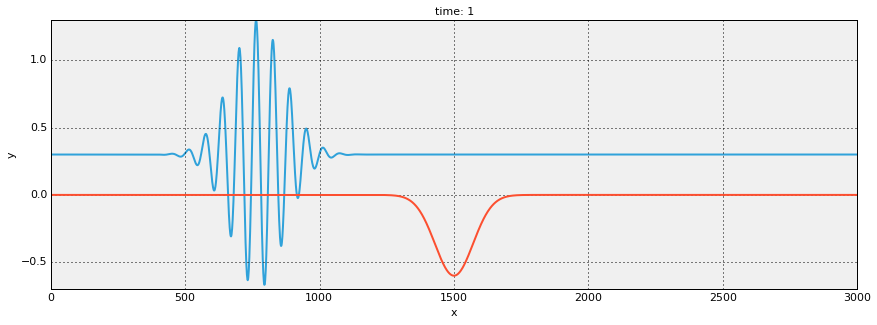
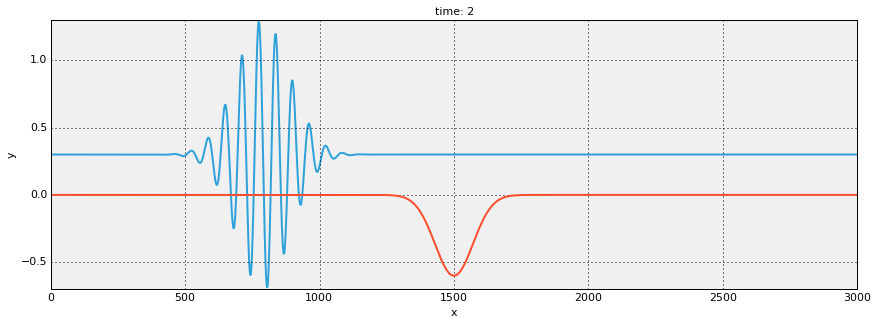
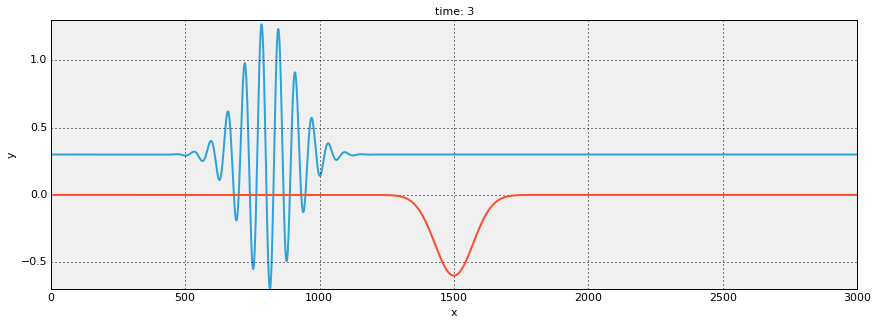
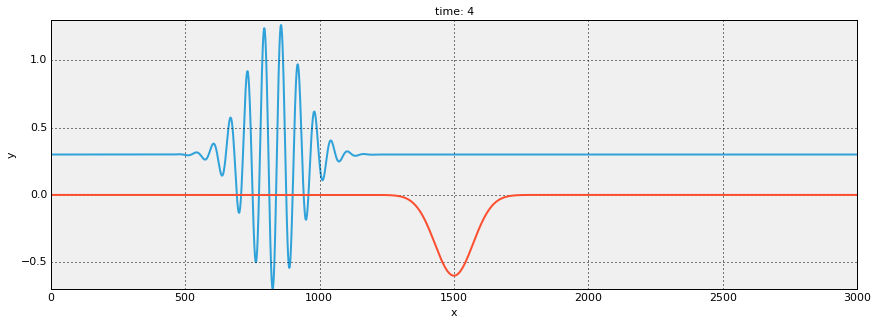
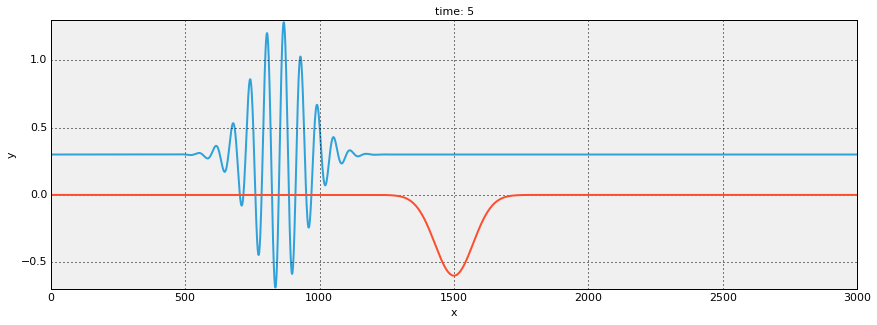
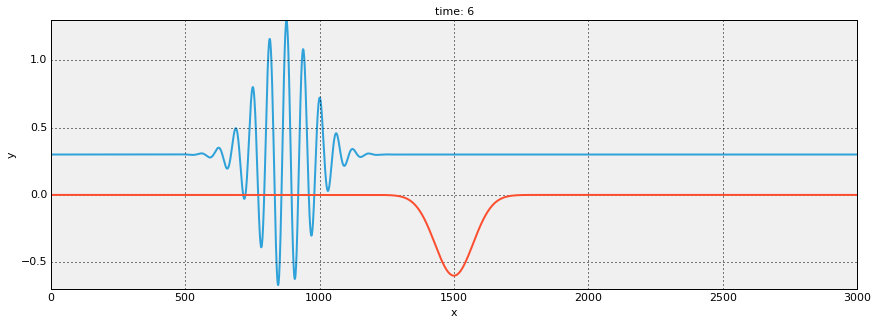
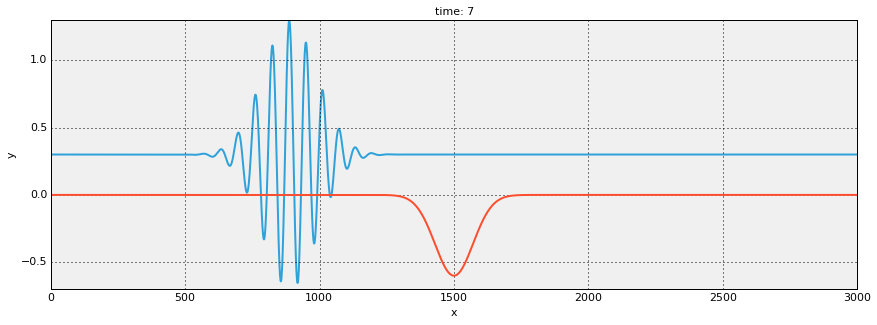
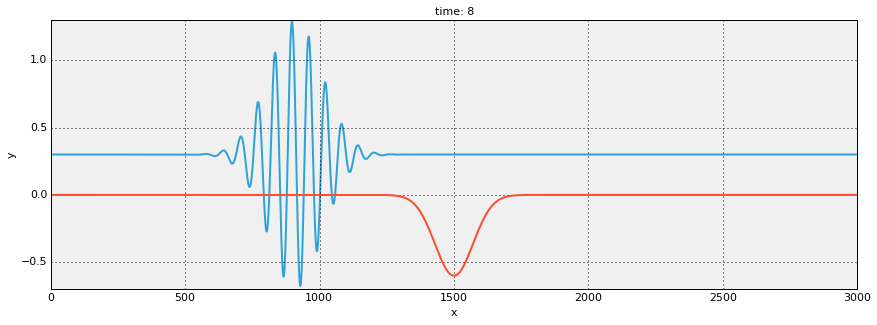
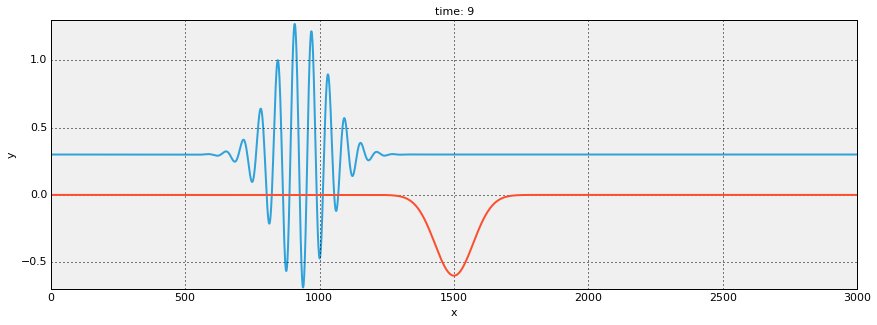
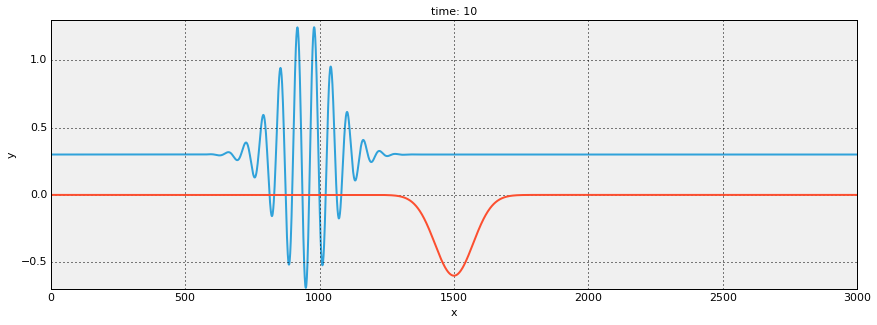
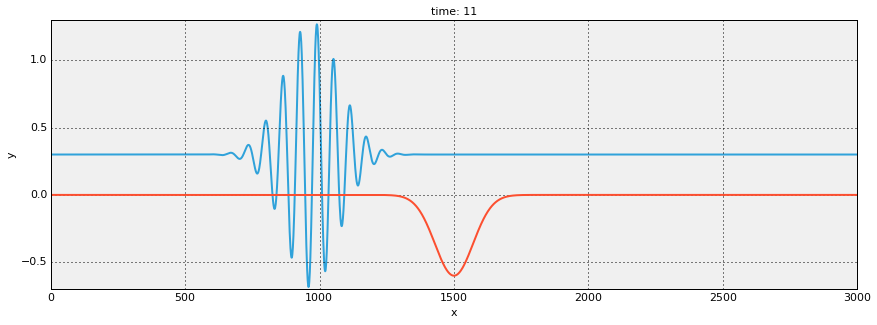
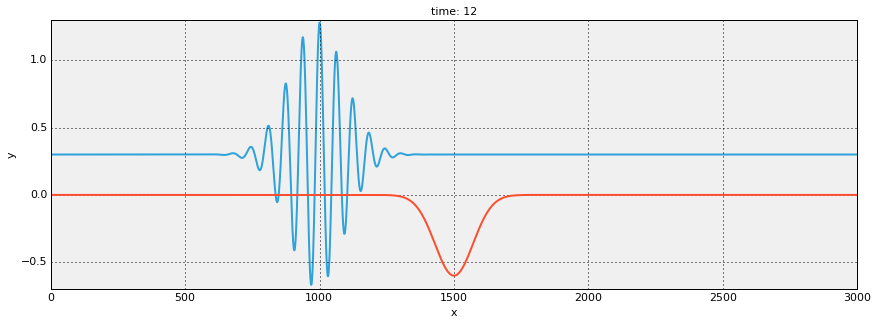
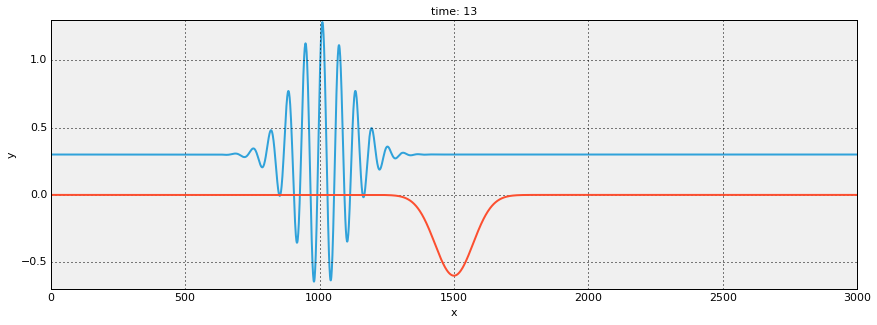
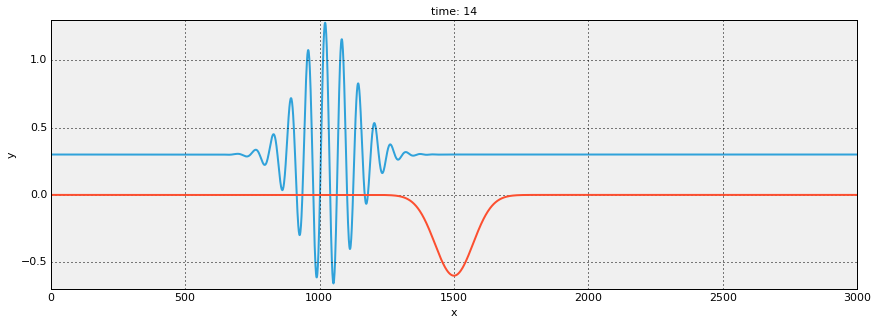
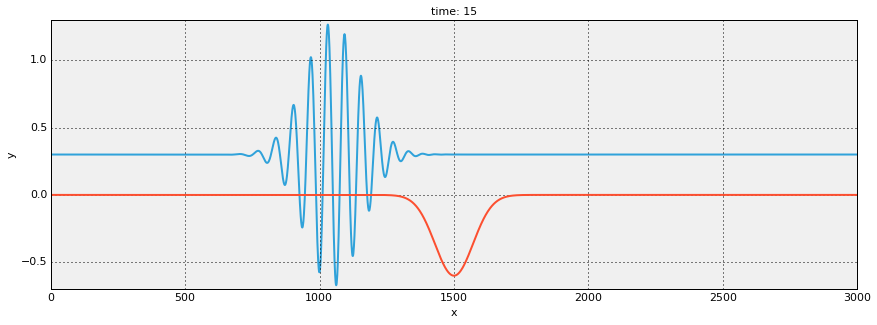
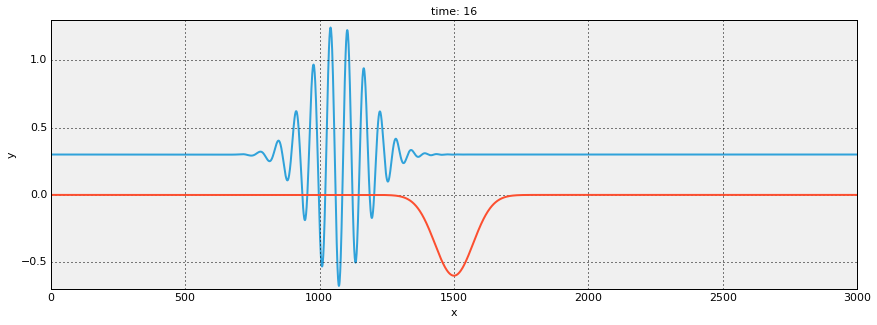
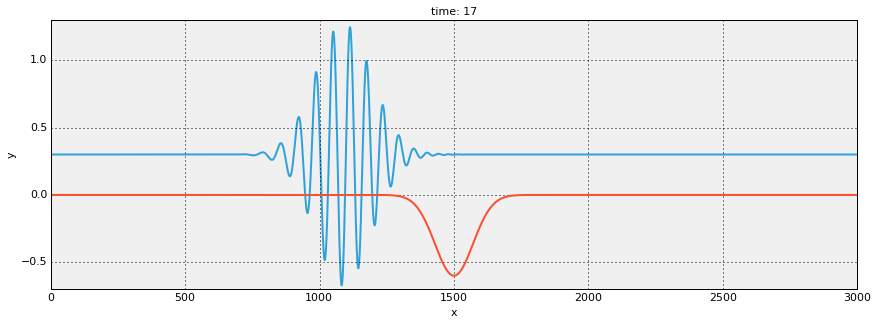
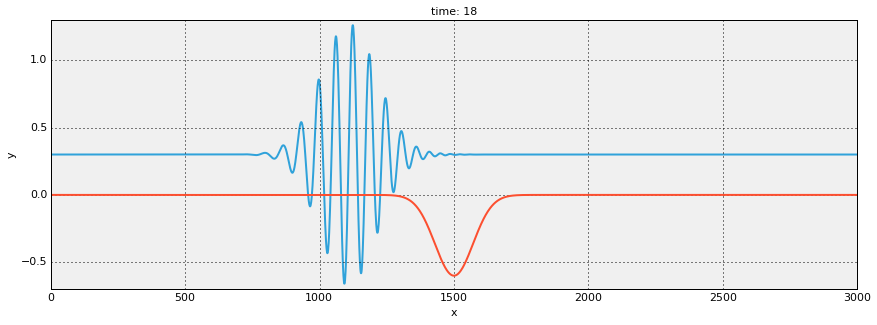
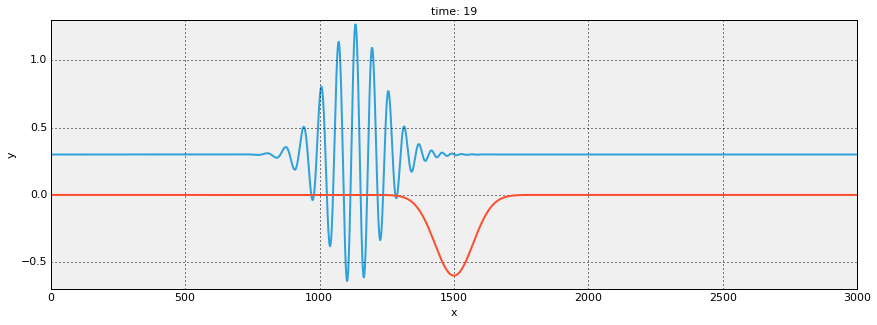
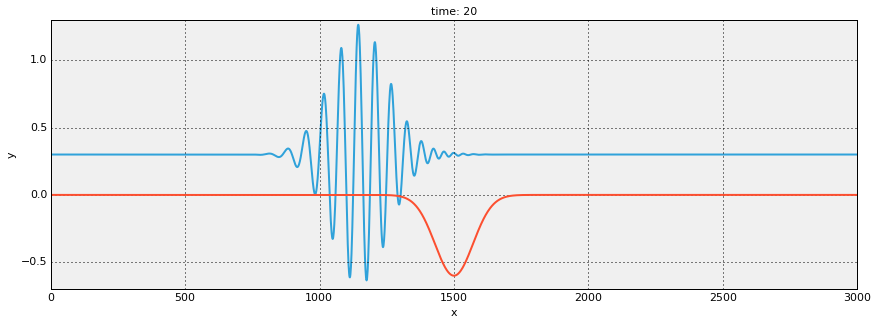
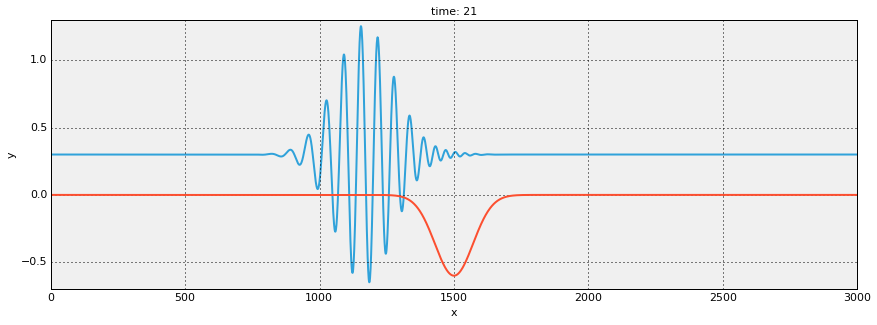
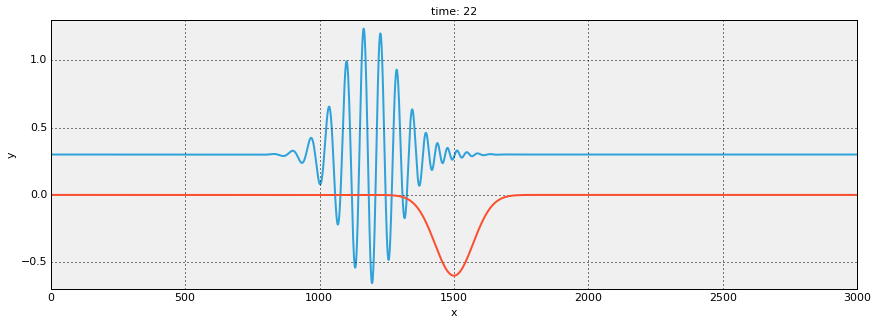
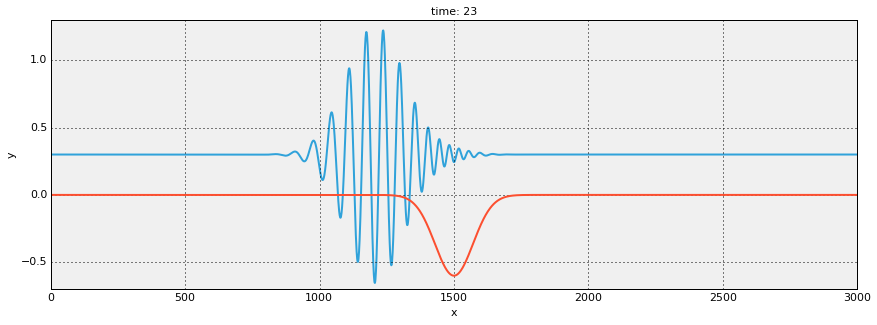
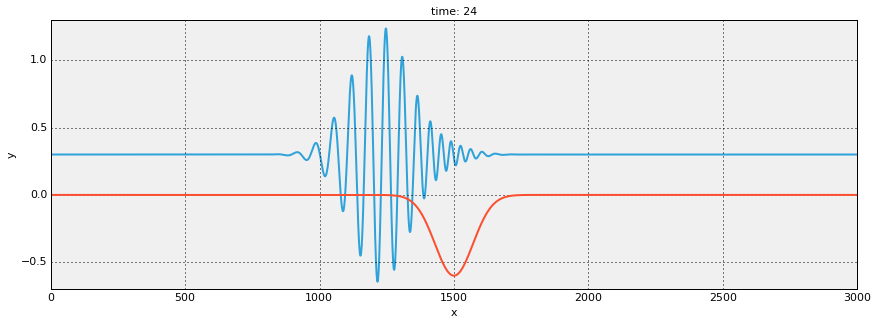
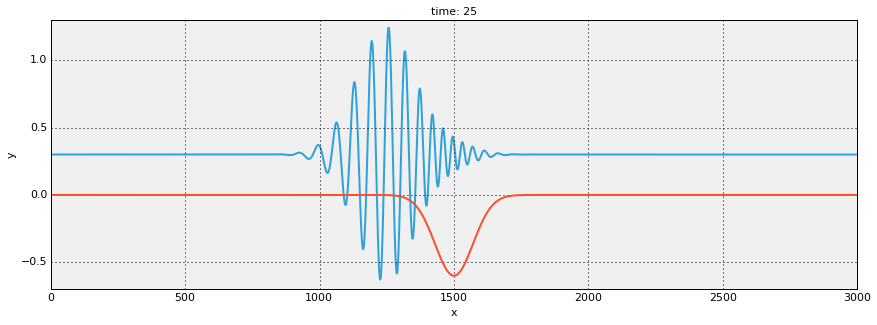
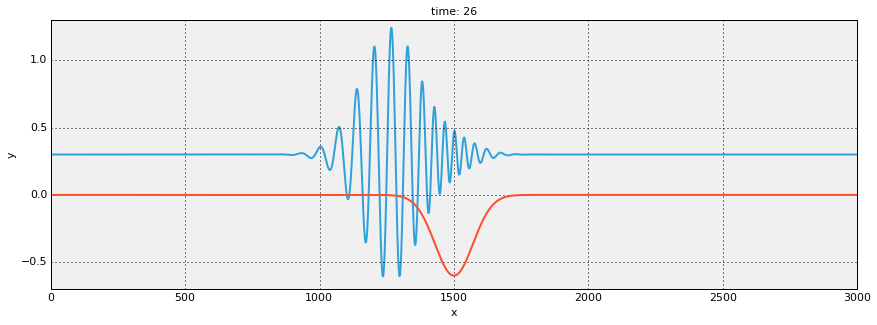
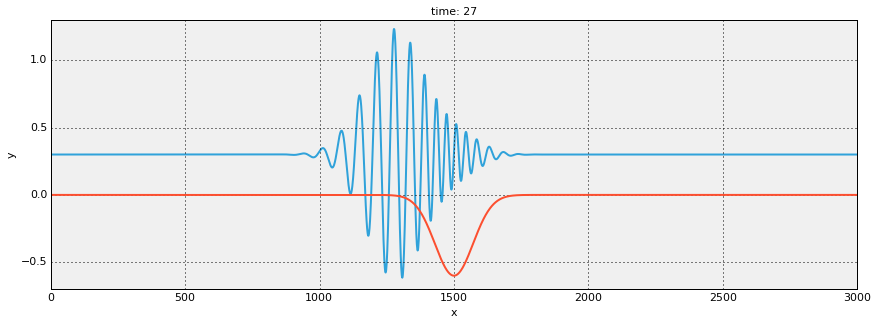
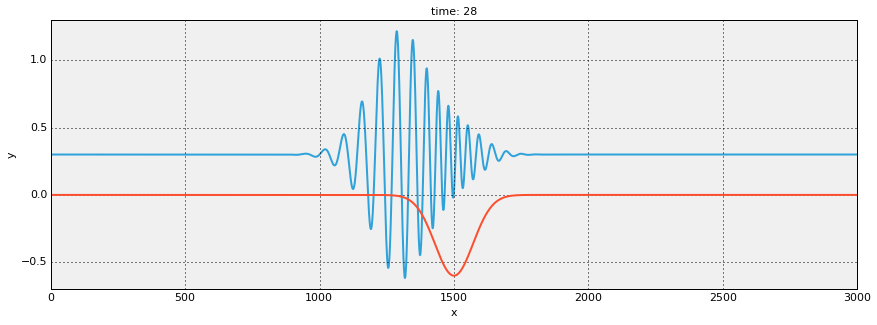
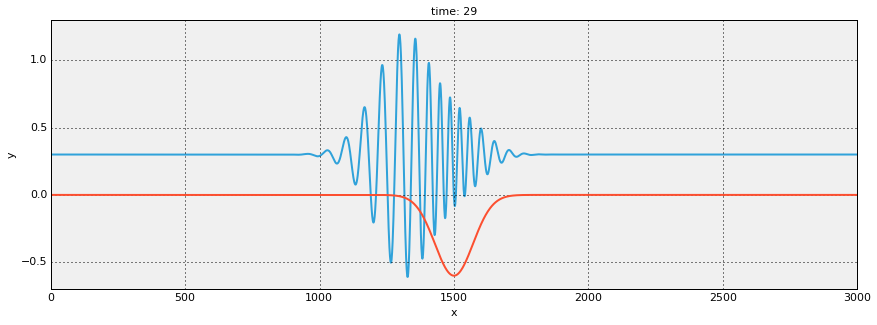
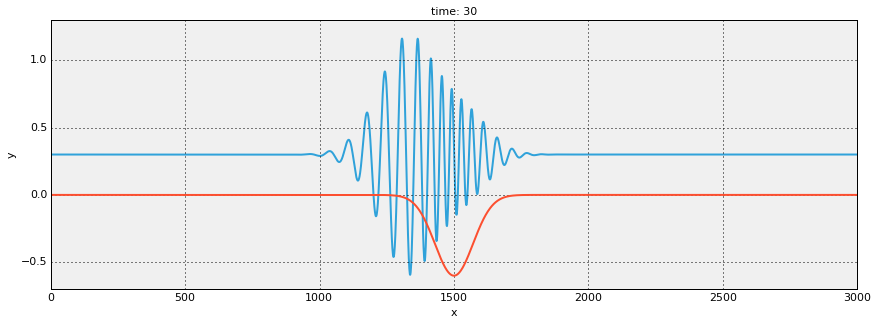
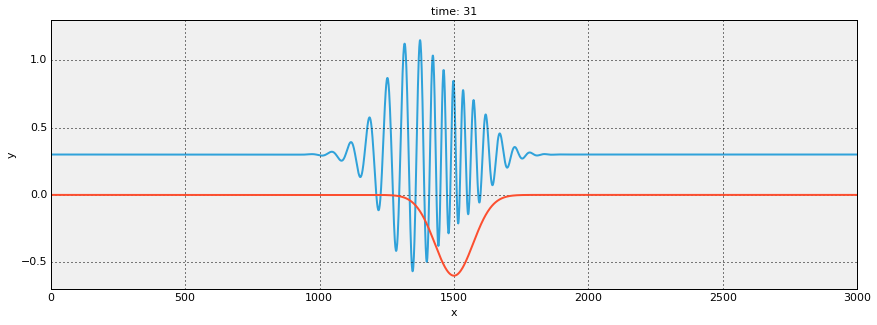
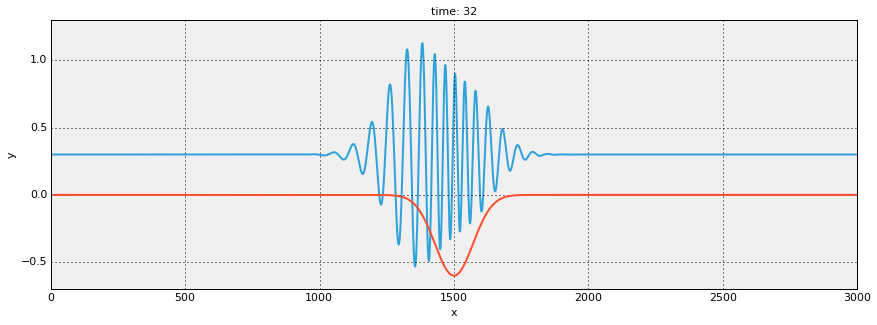
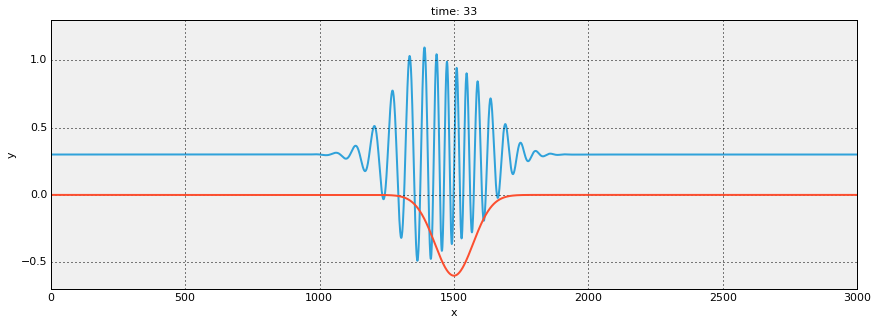
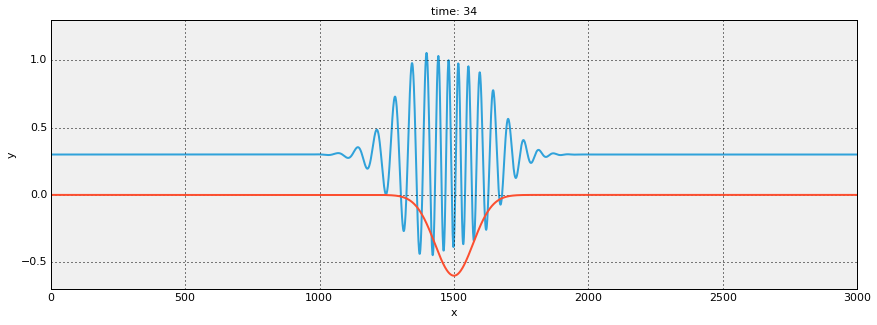
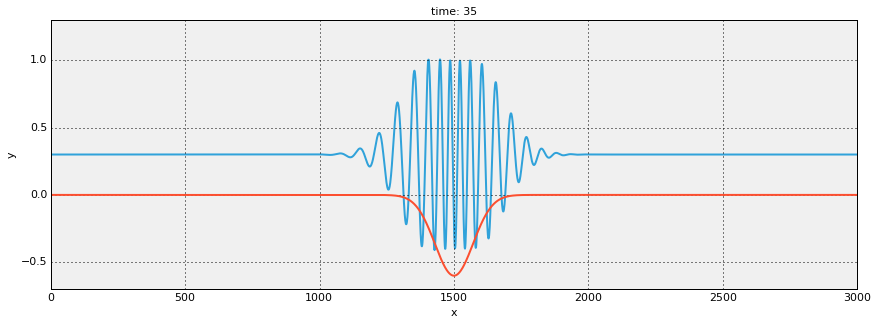
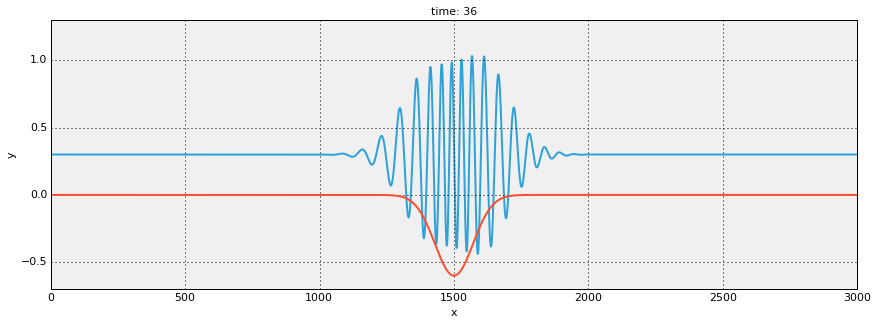
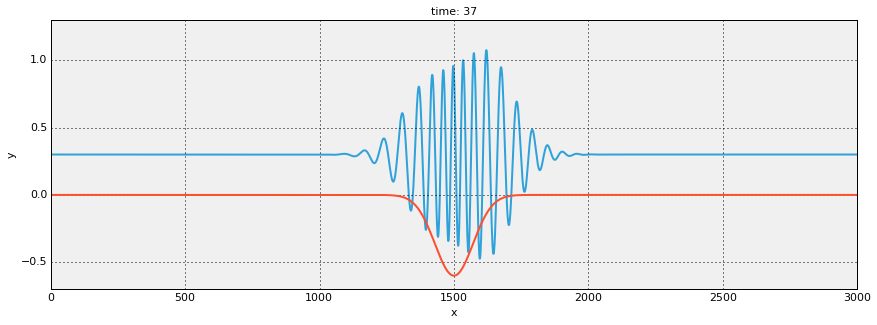
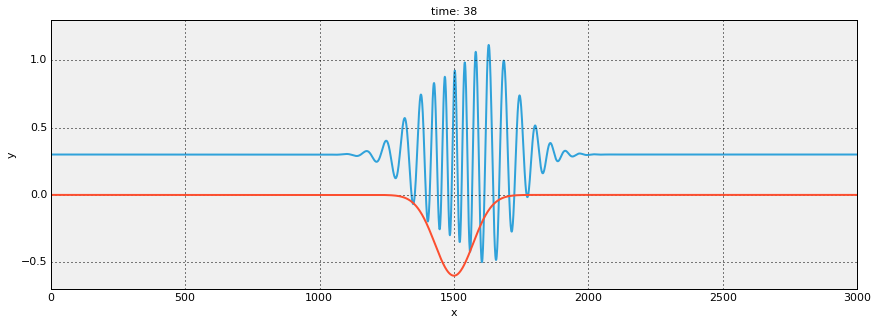
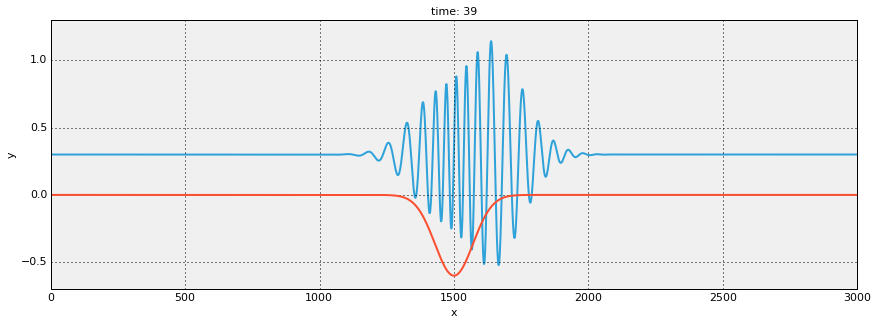
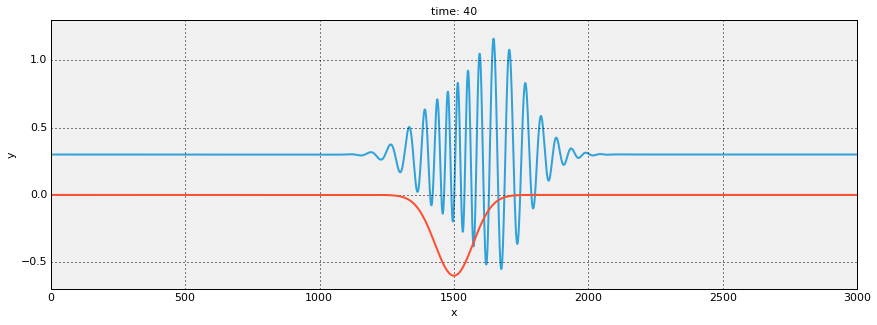
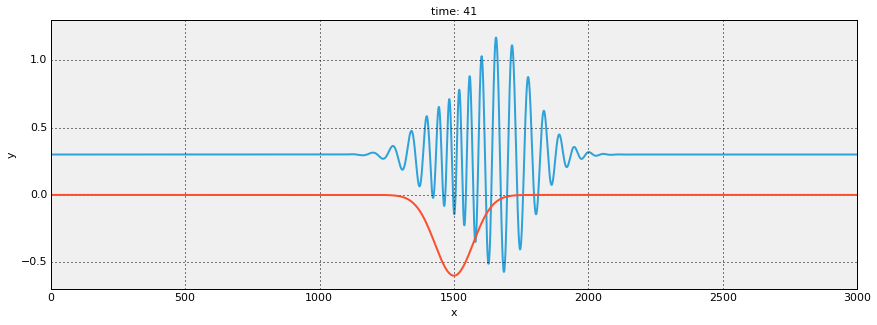
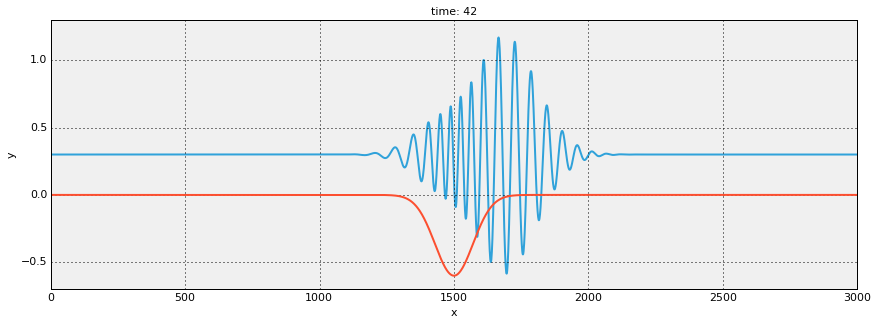
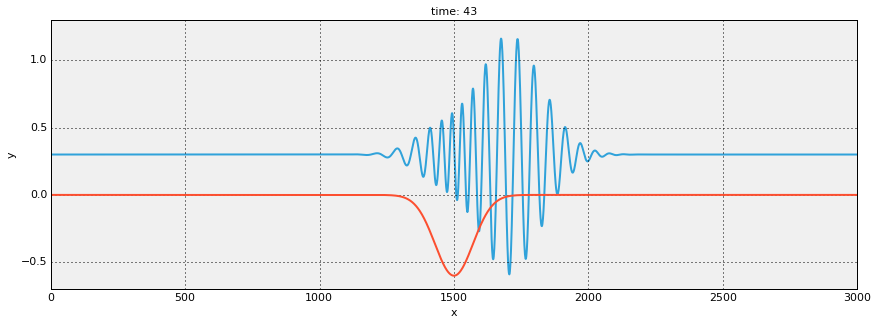
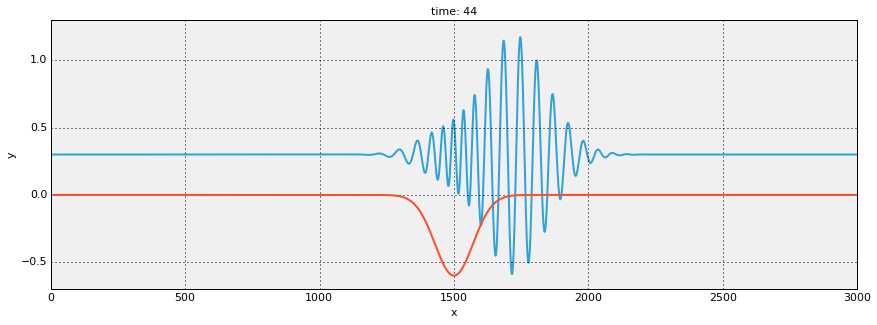
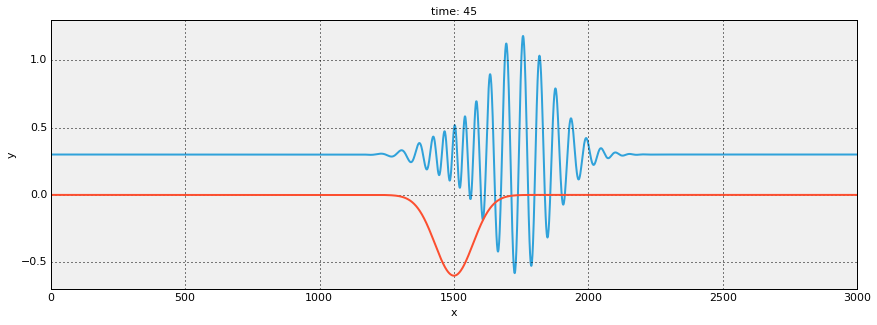
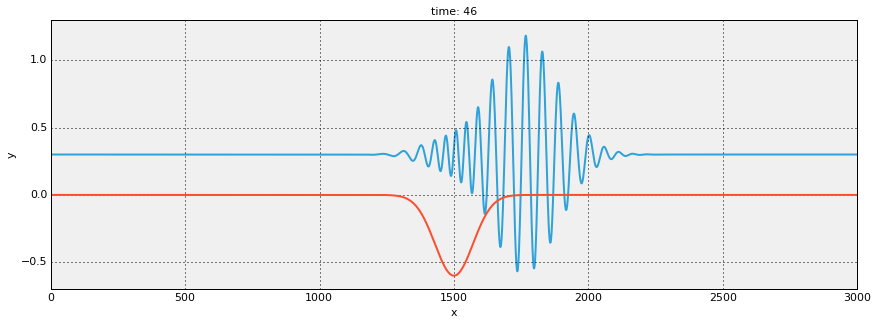
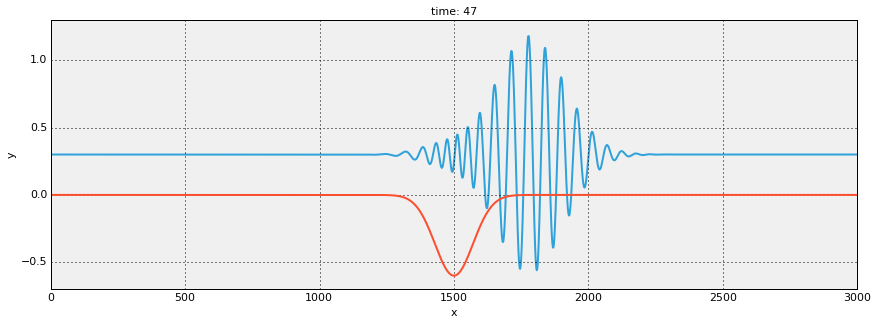
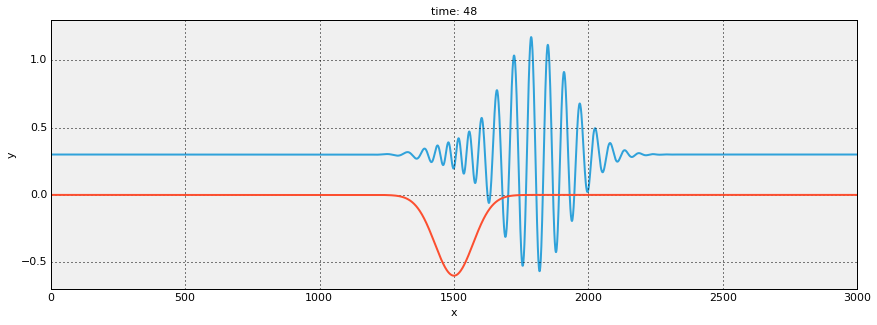
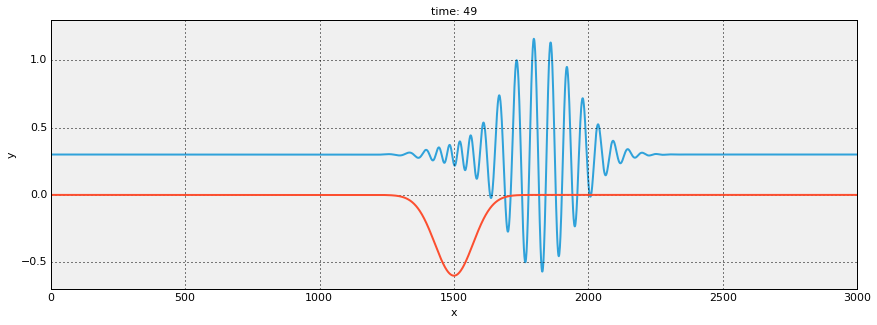
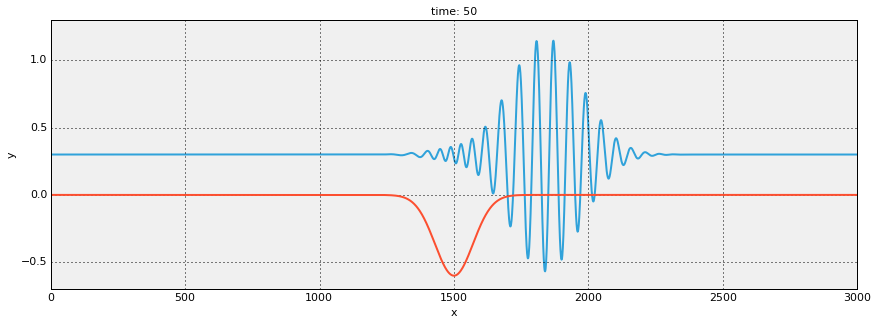
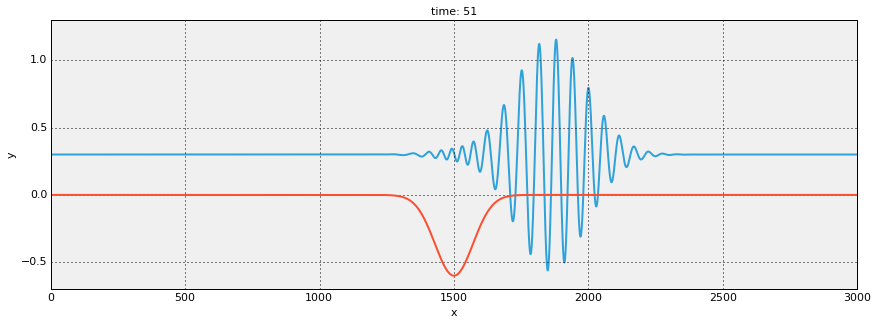
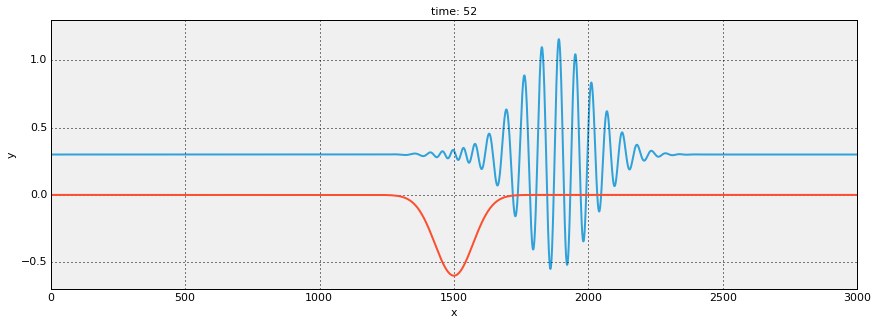
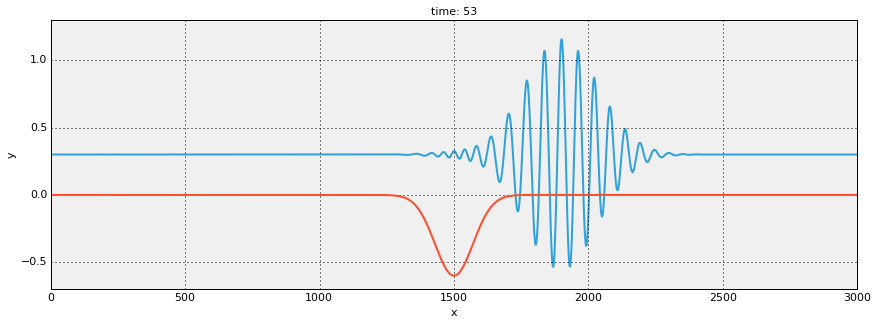
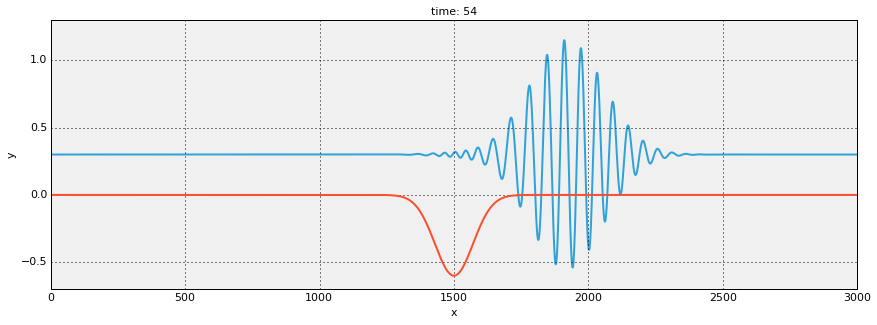
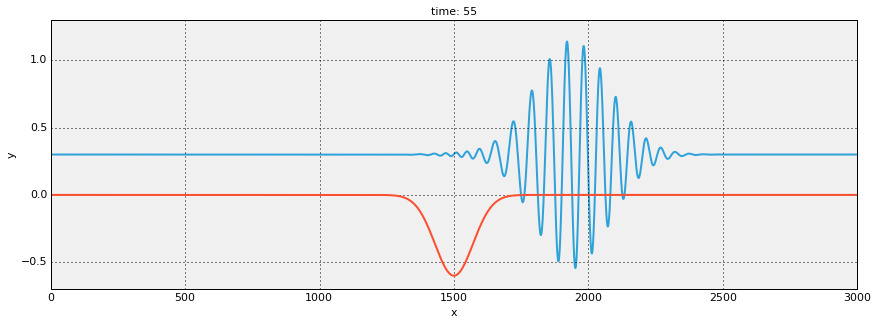
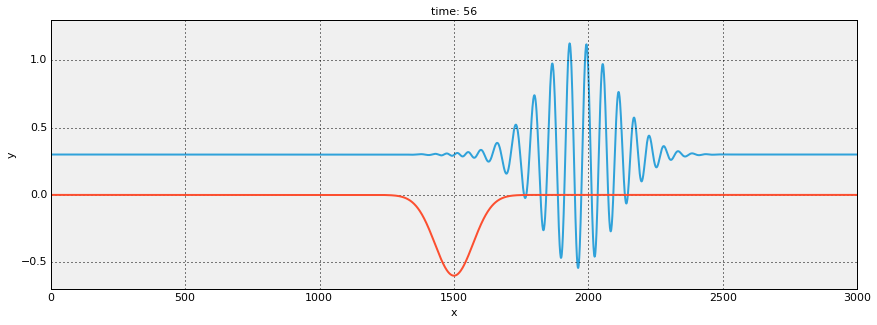
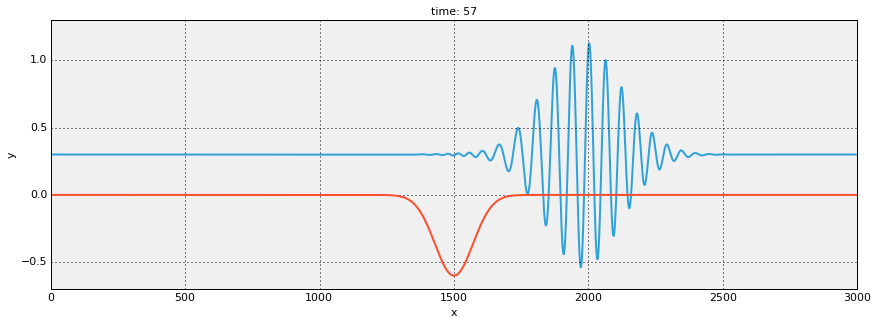
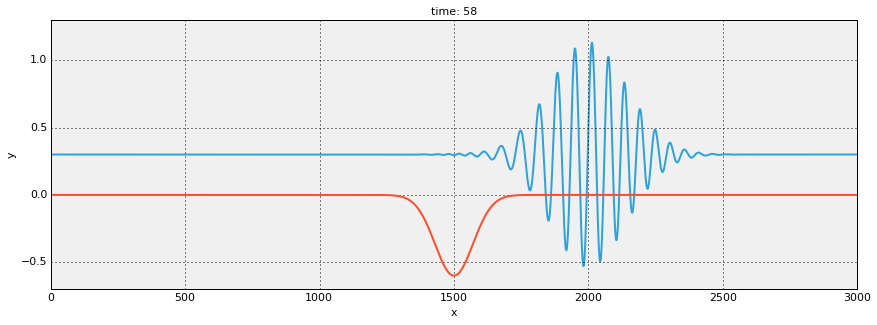
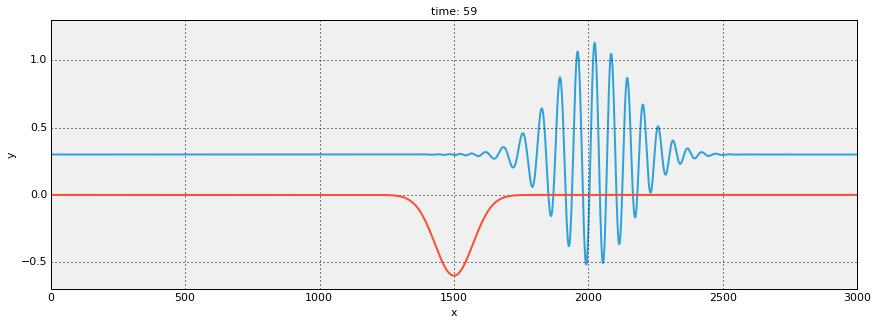
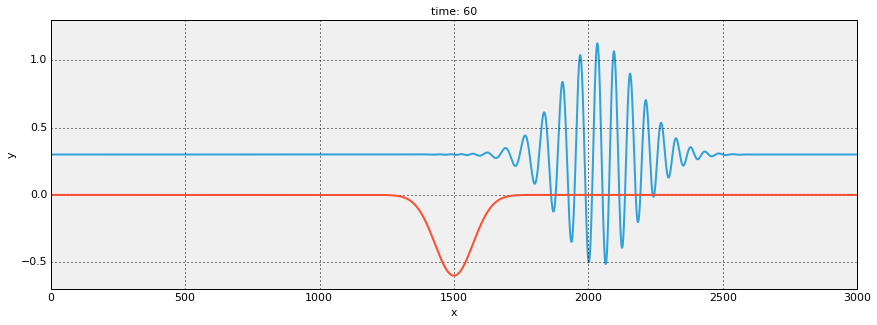
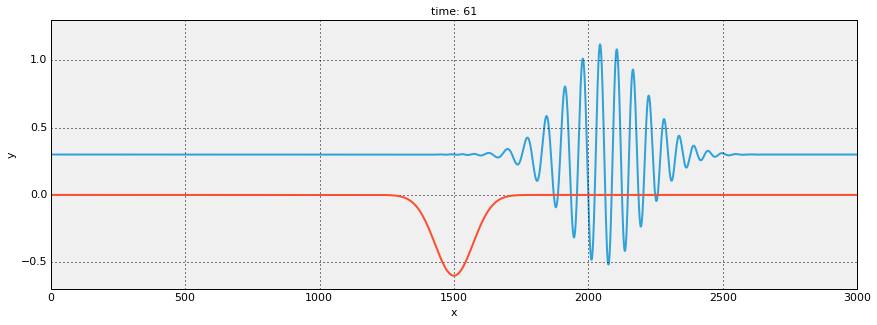
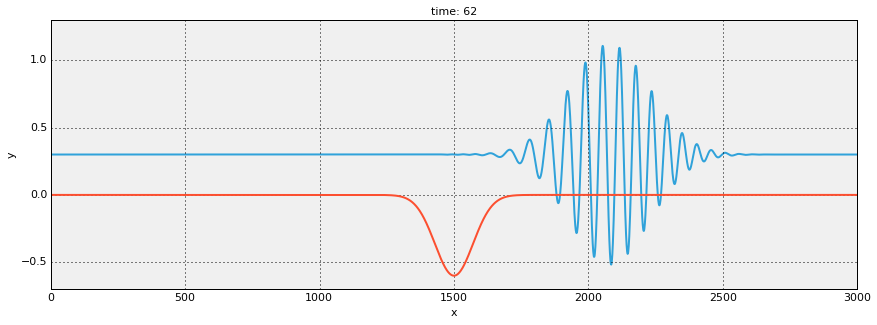
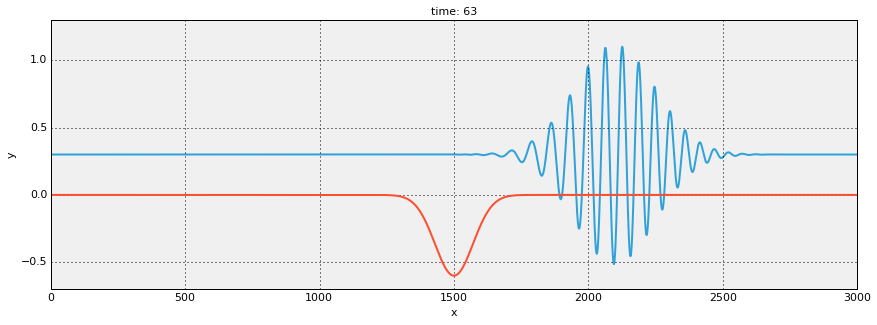
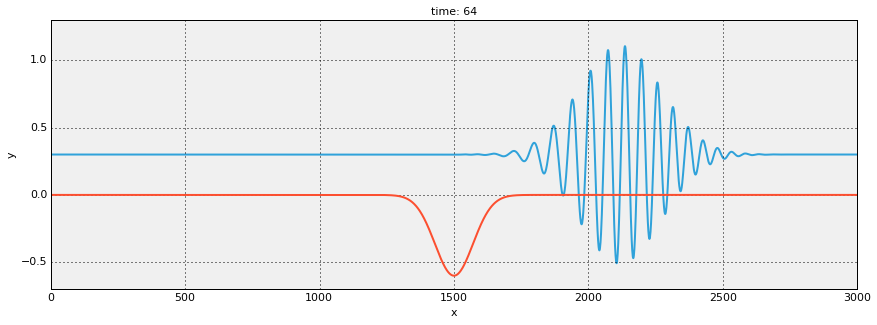
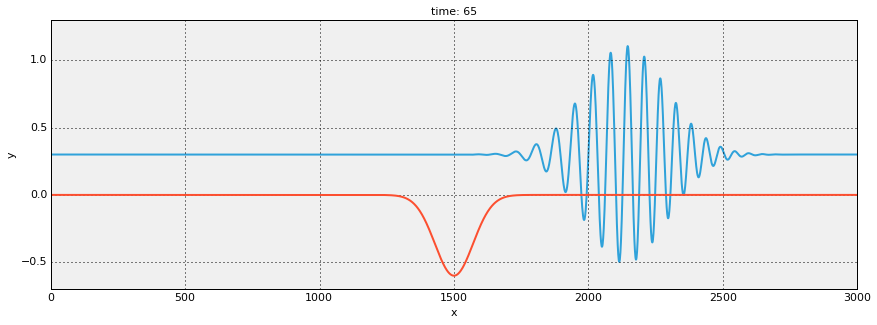
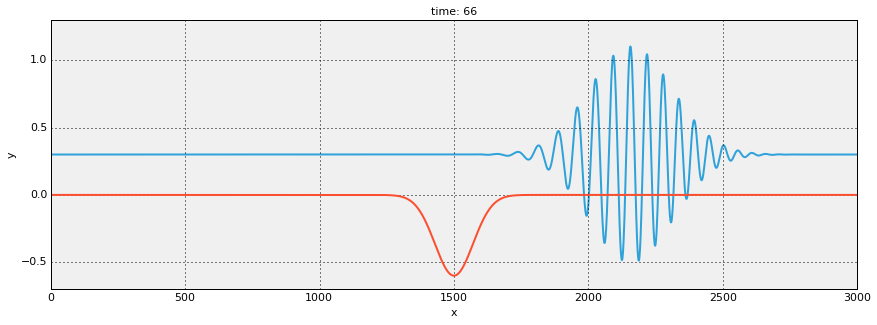
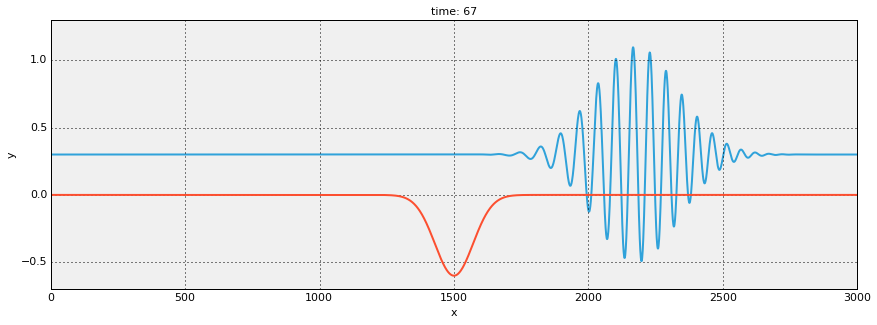
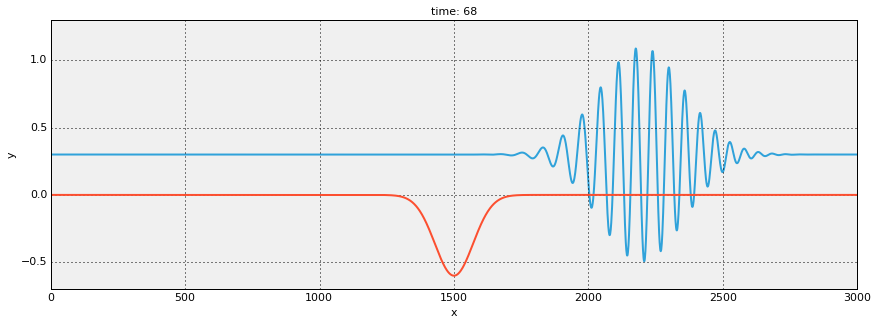
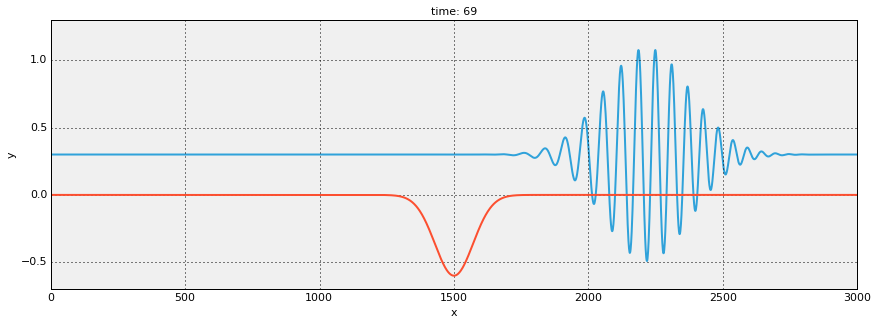
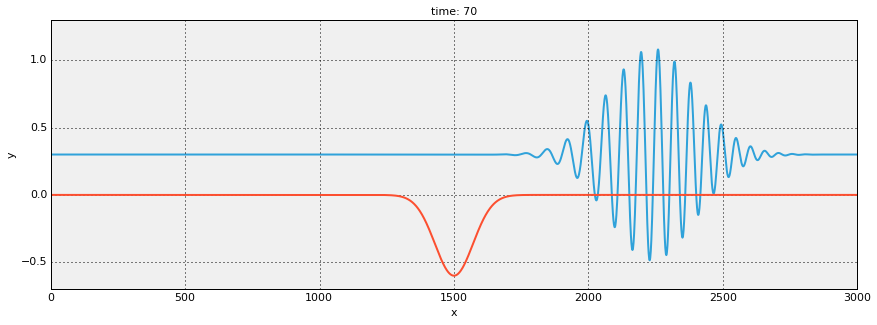
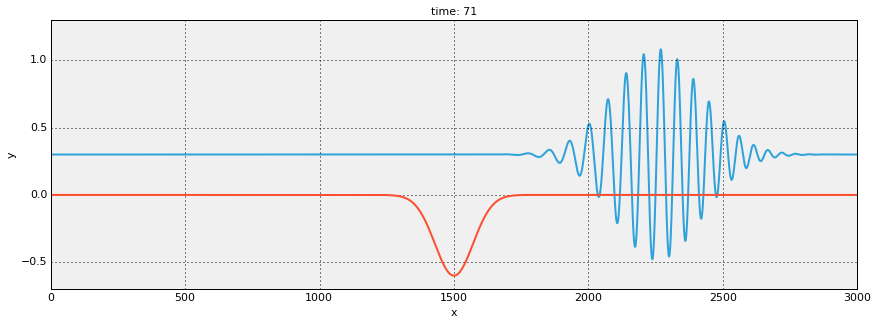
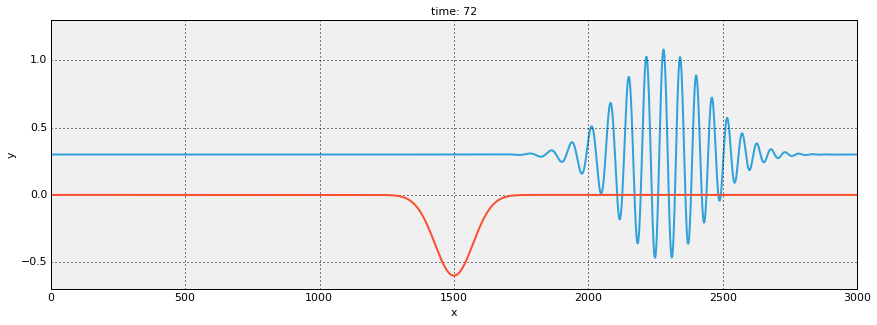
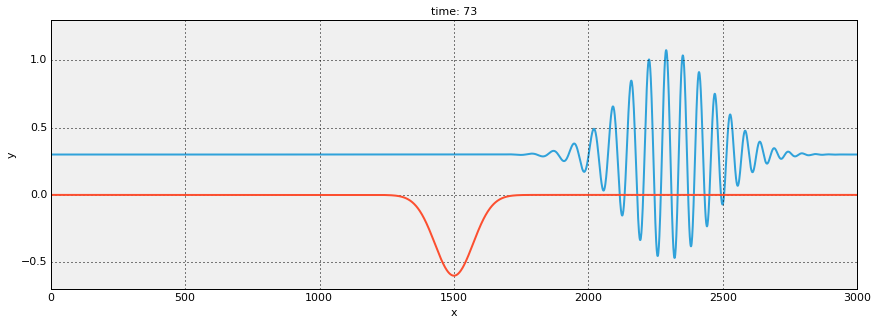
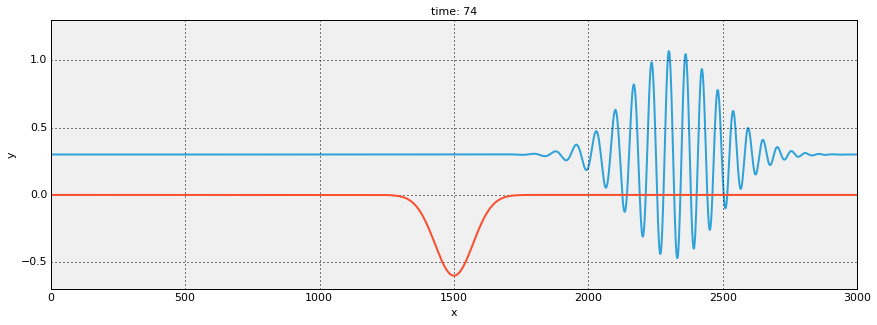
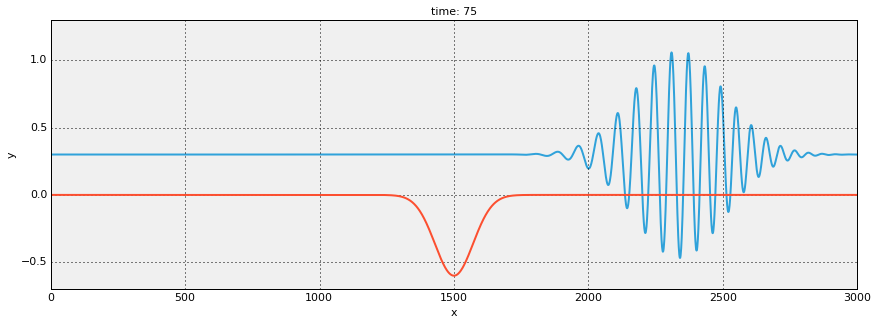
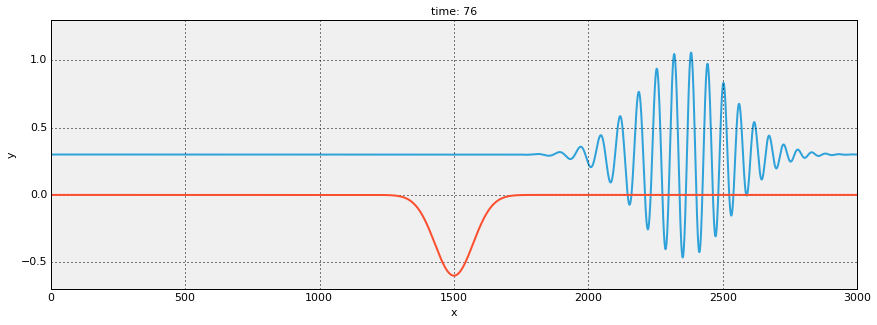
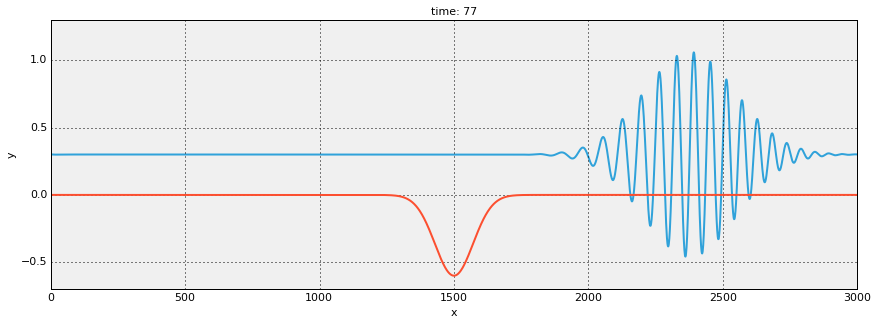
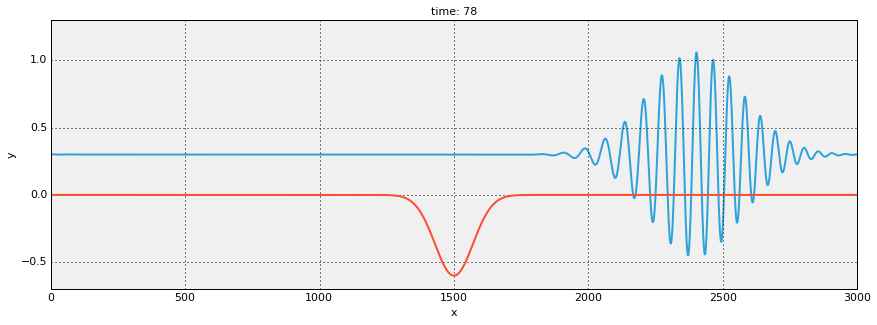
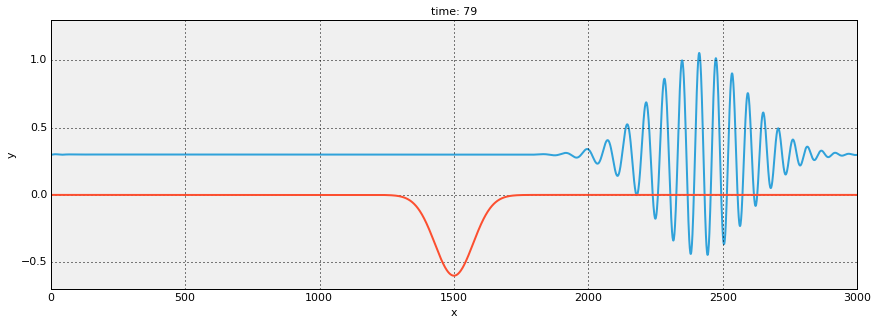
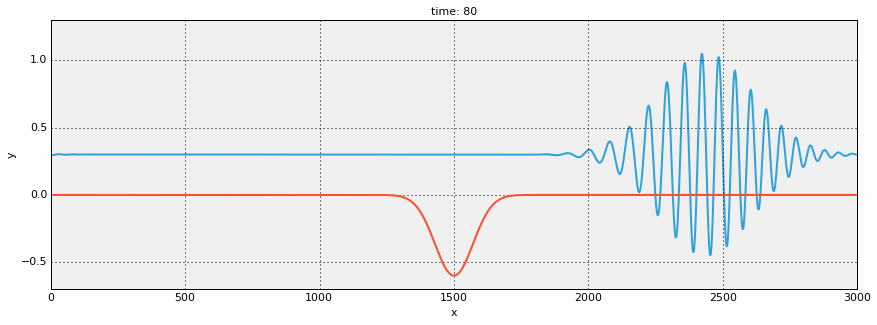
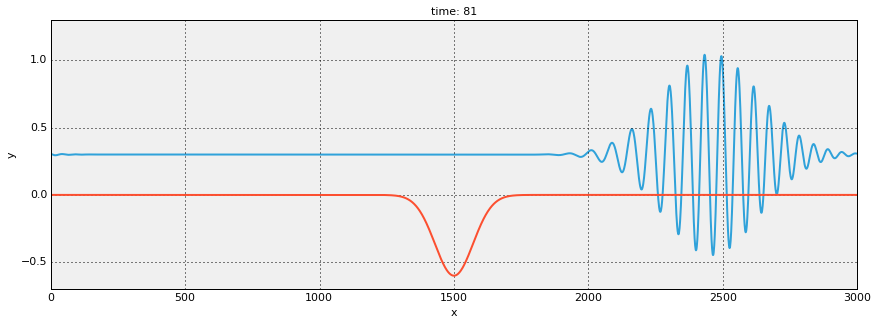
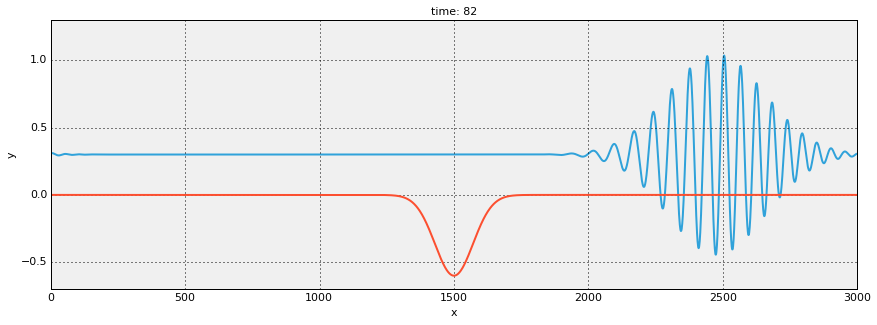
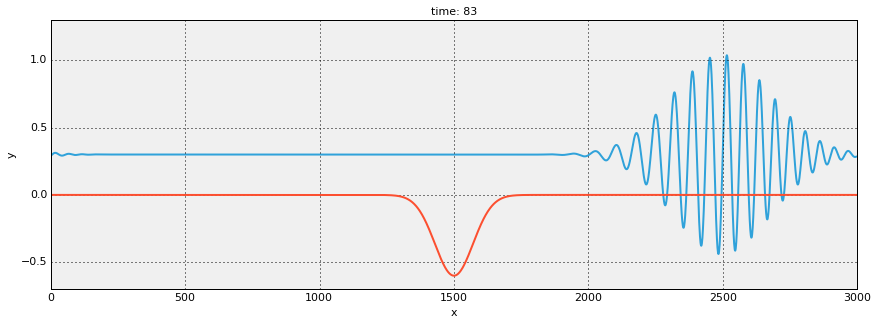
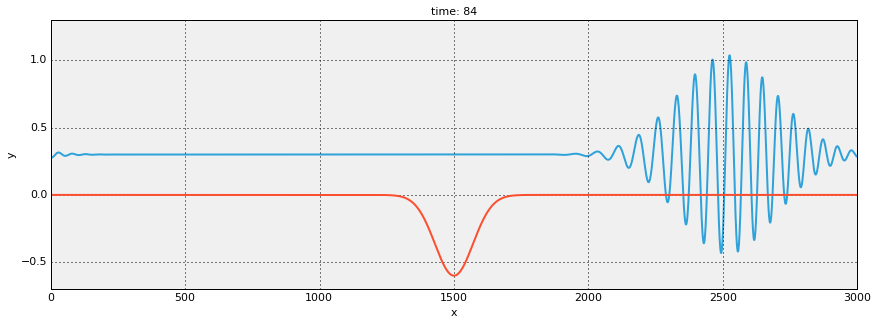
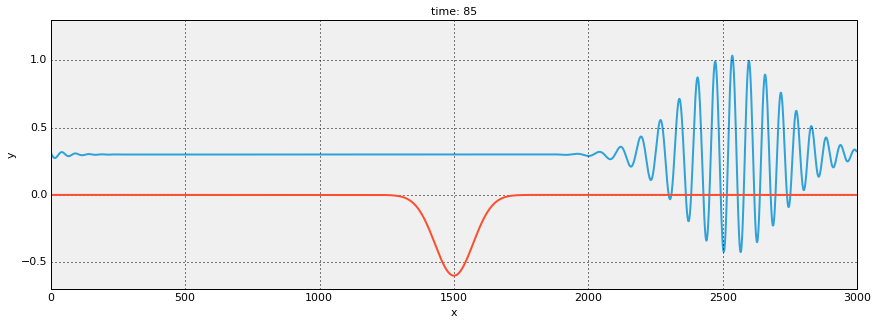
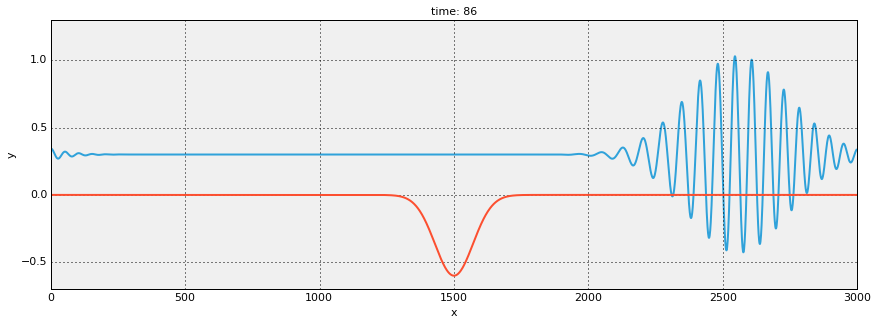
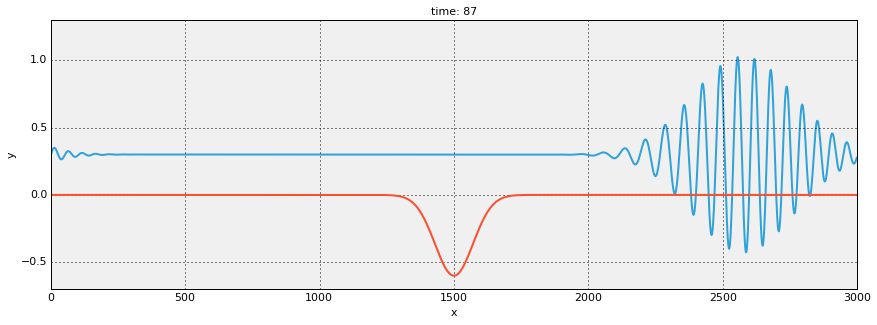
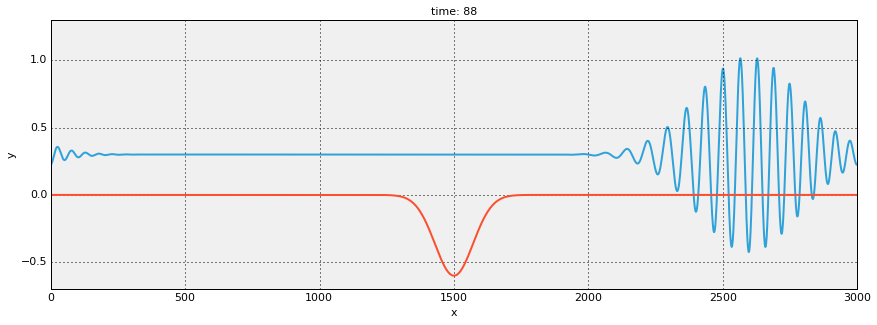
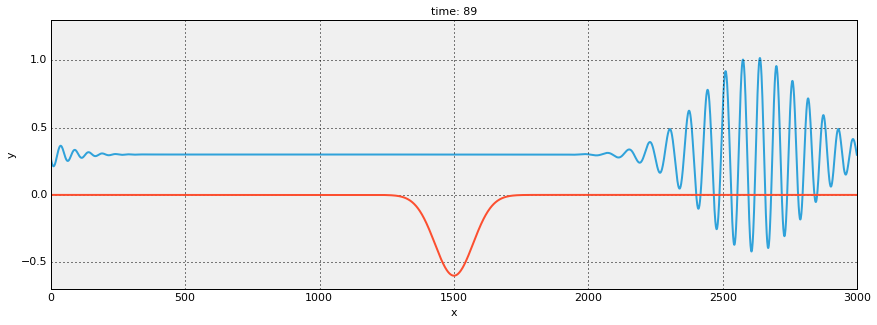
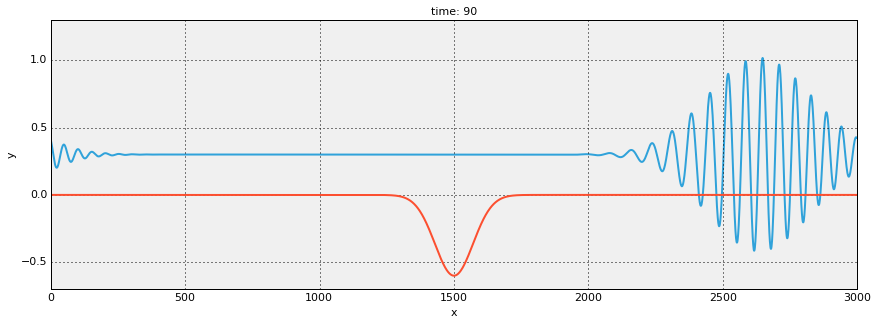
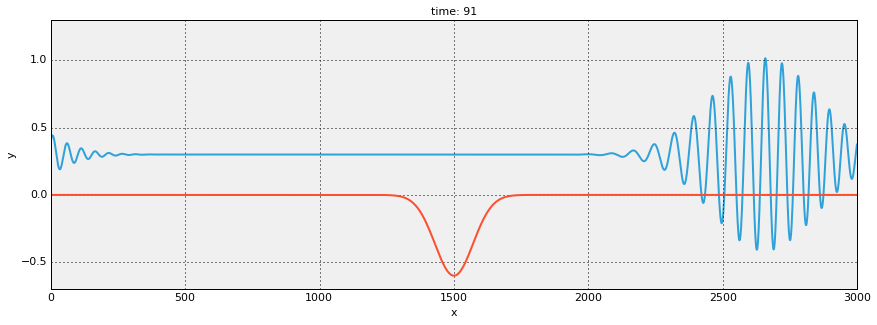
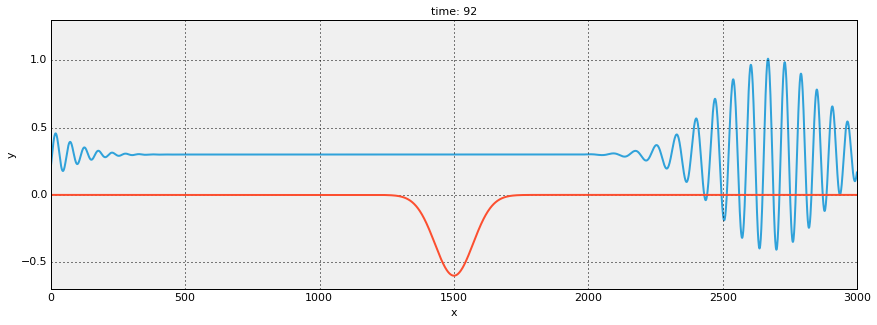
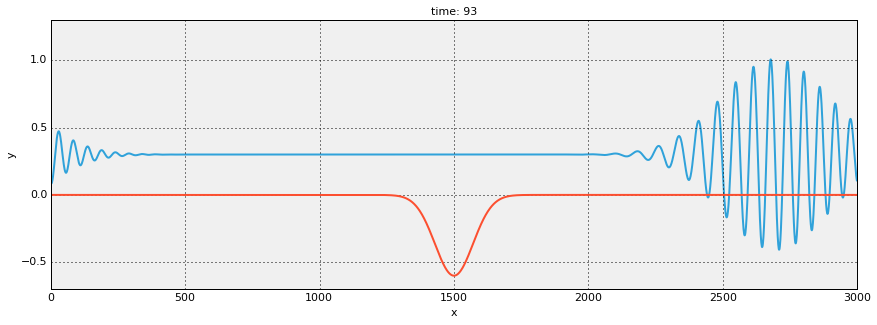
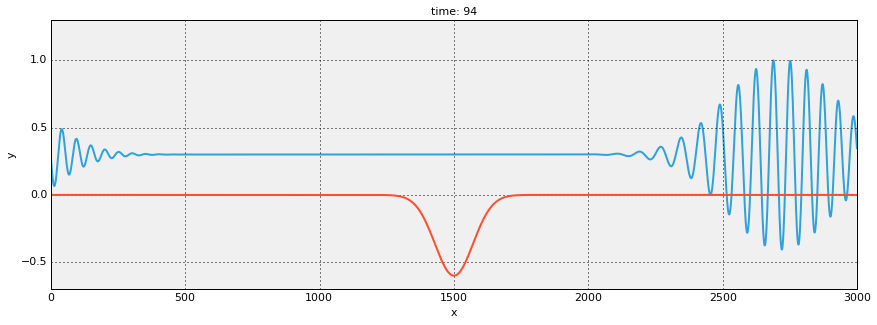
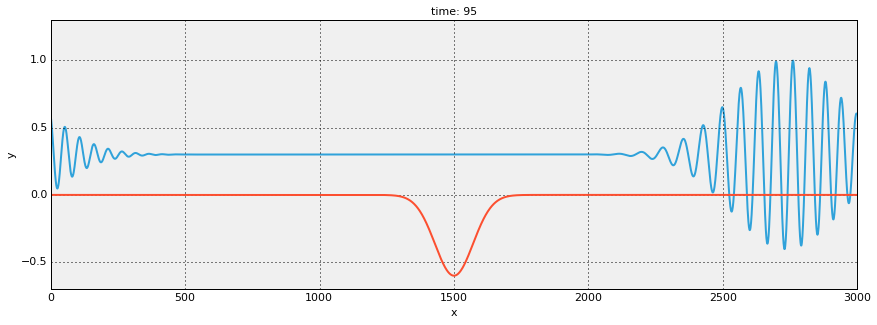
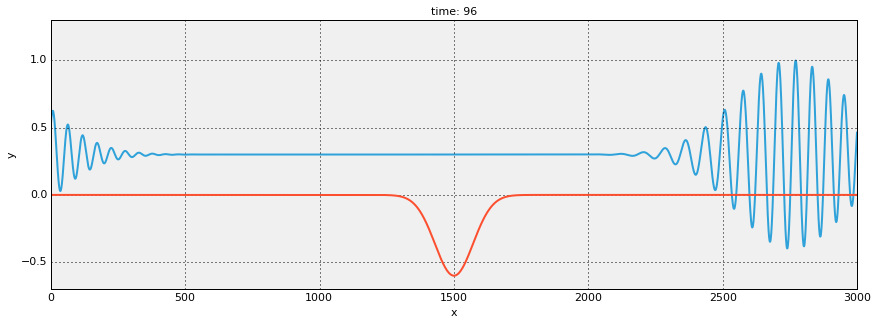
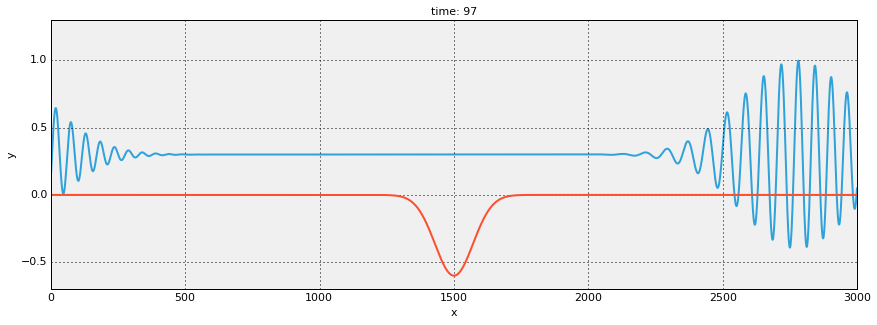
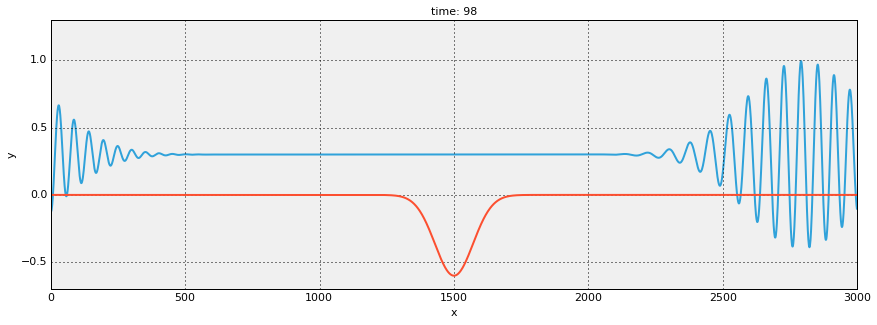
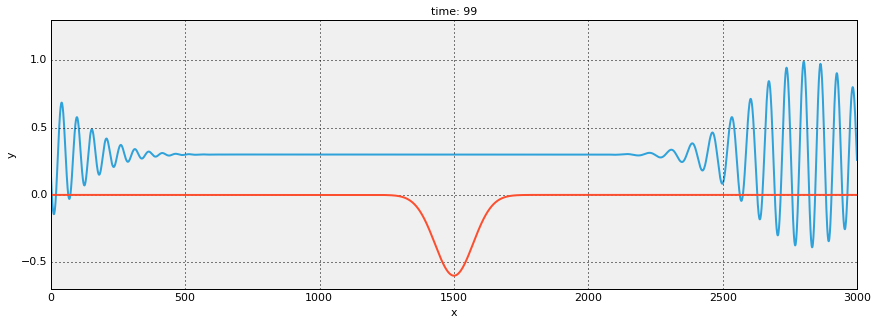

In [139]:
%%opts Overlay plot[aspect=3]
%%output size=400

dimensions = ["time"]
hv.HoloMap([(t, hv.Curve(psis[t].real+energy*30)  * hv.Curve(pot*30))
            for t in xrange(len(psis))], kdims=dimensions)

## Plot using Ipython widgets

Alternative way of plotting

In [140]:
from IPython.html.widgets import interact

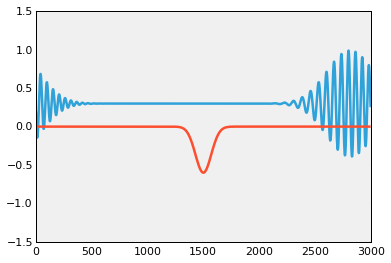

In [141]:
def plot(i):
    plt.plot(psis[i].real+energy*30)
    plt.plot(pot*30)
    plt.ylim(-1.5,1.5)
interact(plot, i=(0, 99))